In [1]:
from tensorflow.keras.models import load_model
import numpy as np
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from PIL import Image
import os
import shutil
import random
import matplotlib.pyplot as plt
import math
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

## Charger les données

In [2]:
train_dir = 'C:\\Users\\Utilisateur\\Documents\\15_nonSuperviseClassification\\MedNIST Training Dataset'

# Créez un générateur d'images avec prétraitement pour l'ensemble d'entraînement (train)
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Utilisez les générateurs pour charger et prétraiter les ensembles de formation (train), de validation et de test
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64,64),
    batch_size=47163,
    class_mode='sparse'
)

X, y = next(train_generator)


Found 47169 images belonging to 6 classes.


## Extraction des caracteristiques et charger le modèle

In [3]:

# Chargement du modèle ResNet-50 pré-entraîné
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3)) 

#  extraire des caractéristiques
test_features = base_model.predict(X)

x_test = test_features.reshape(test_features.shape[0], -1)

# Chargez le modèle SVM
svm_model = joblib.load('modele_svm.pkl')



1474/1474 [==============================] - 485s 328ms/step


## Faire des prédictions et evaluer le modèle

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Faites des prédictions
y_pred_test = svm_model.predict(x_test)

# evaluation du modèle
print(classification_report(y, y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7998
         1.0       1.00      1.00      1.00      7163
         2.0       1.00      1.00      1.00      7999
         3.0       1.00      1.00      1.00      7999
         4.0       1.00      1.00      1.00      8000
         5.0       1.00      1.00      1.00      8004

    accuracy                           1.00     47163
   macro avg       1.00      1.00      1.00     47163
weighted avg       1.00      1.00      1.00     47163



## Matrice de confusion

In [6]:
# Créez la matrice de confusion
confusion = confusion_matrix(y, y_pred_test)
print("Matrice de confusion :")
print(confusion)

Matrice de confusion :
[[7998    0    0    0    0    0]
 [   0 7163    0    0    0    0]
 [   0    0 7999    0    0    0]
 [   0    0    0 7999    0    0]
 [   0    0    0    0 8000    0]
 [   0    0    0    0    0 8004]]


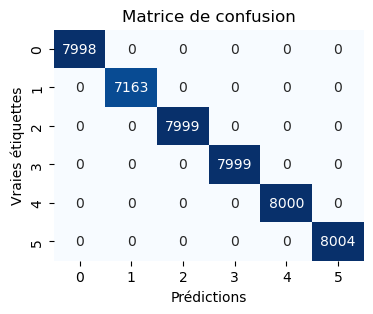

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créez une heatmap à partir de la matrice de confusion
plt.figure(figsize=(4, 3))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()